Please change the path below to where you store all versions

In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
sys.path.append(r'S:\\Bathymetry_Uncertainty18_combination_rmse\\LISFLOOD_FP\\Analysis')

In [2]:
import matplotlib.pyplot as plt                             # For plotting
import seaborn as sns                                       # For plotting
import pandas as pd                                         # For reading data
import numpy as np

from comparison import get_datalist, statistic_df_dict, \
                       boxplotting, kdeplotting, comparison_calculation             # For boxplotting and kdeplotting
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib

#### 1. Get data

Please change the path below to where you store the building file

In [3]:
building_path = fr"S:\\new_versions\data\buildings\lds-nz-building-outlines-all-sources-SHP_002.zip"

#### 2. Function

In [4]:
import matplotlib
import colorsys
import matplotlib.colors as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
def lighten_color(color, amount=0.5):
    """
    @Definition:
                A function to lighten the color (by @IanHincks)
    @References:
                https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib/49601444#49601444
                https://stackoverflow.com/questions/55656683/change-seaborn-boxplot-line-rainbow-color
    @Arguments:
                color (matplotlib color):
                                A tuple of 3 values of RGB color
                amount (float):
                                Level of brightness of color
    @Returns:
                A new tuple of 3 values of RGB color
    """
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

------------------------------------------------------------------------------

Please change all the path lists below to where you stored the folder version on your machine

### Coefficient of variation

In [6]:
list_filename = [
    r"S:\\Bathymetry\\version013\\rupp_slope_001",
    r"S:\\Bathymetry\\version013\\rupp_flow_001",
    r"S:\\Bathymetry\\version013\\rupp_width_001",
    r"S:\\Bathymetry\\version013\\rupp_combination_001",
    
    r"S:\\Bathymetry\\version013\\neal_slope_001",
    r"S:\\Bathymetry\\version013\\neal_flow_001",
    r"S:\\Bathymetry\\version013\\neal_width_001",
    r"S:\\Bathymetry\\version013\\neal_combination_001",
]

name = [
    'slope - CMR',
    'flow - CMR',
    'width - CMR',
    'combination - CMR',
    
    'slope - UF',
    'flow - UF',
    'width - UF',
    'combination - UF'
]

list_resolution = [10]

In [7]:
%%time
bathy_datasets = get_datalist(
    list_filename,
    list_resolution,
    building_path,
    0.1
)

trans_comparison = statistic_df_dict(
    name,
    bathy_datasets
)

CPU times: total: 4min 39s
Wall time: 5min 19s


In [8]:
bathy_comparison = trans_comparison

#### Plot - CV

Method 1 - not grouped by parameters but by formulas

In [9]:
x_label = 'Coefficient of variation (%)'
y_label = 'Parameters'

data_selection = bathy_comparison['cv']
calculation_option = 'cv'

figsize=(7, 6)

Text(47, 3.5, '0.51\n1.53\n1.87\n2.50\n0.85\n1.57\n1.97\n2.68')

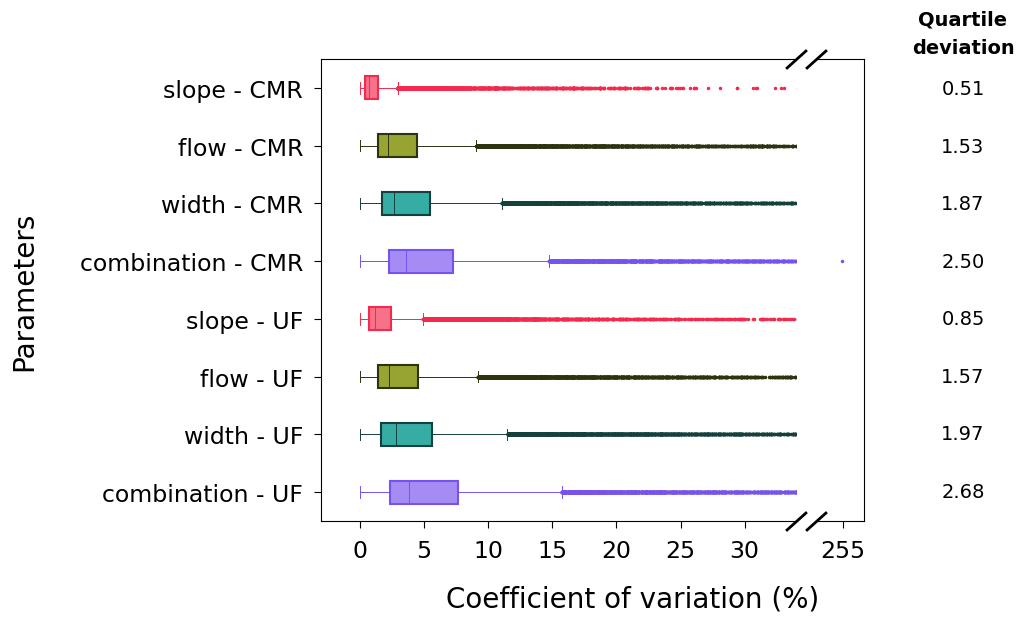

In [10]:
fig, ax = plt.subplots(figsize=figsize)

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax1 = ax
divider = make_axes_locatable(ax)
ax2 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax2)

# BOXPLOT
# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=sns.husl_palette(4), saturation=1, ax=ax1
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=sns.husl_palette(4), saturation=1, ax=ax2
)

# Zoom-in / limit the view to different portions of the data
ax1.xaxis.set_ticks(np.arange(0, 35, step=5))
ax1.set_xlim(left=-3, right=34) # left=-3, right=34

ax2.xaxis.set_ticks(np.arange(245, 258, step=5)[1:])
ax2.set_xlim(left=251, right=258)  # left=104


ax1.margins(x=0)

# Hide the spines between ax1 and ax2
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False) # don't put tick labels at the top

d = .9  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle="none", color='k', mec='k', mew=2, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)


# ax.plot([], [], '|', linewidth=1, color='black', label='median')
# ax.plot([], [], 's', linewidth=1, color='black', label='mean')
# ax.legend(fontsize='x-large', frameon=False, loc='lower right')

# Colorise all lines of boxplots
# AXIS 1
box_patches = [
    patch for patch in ax1.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax1.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), 1.5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax1.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# AXIS 2
box_patches = [
    patch for patch in ax2.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax2.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), 1.5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax2.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# Design x labels
if calculation_option == 'mean':
    x_label = "Mean (m)"
elif calculation_option == 'sd':
    x_label = "Standard deviation (m)"
elif calculation_option == 'cv':
    x_label = "Coefficient of variation (%)"
elif calculation_option == 'cell':
    x_label = "Proportion (%)"
elif calculation_option == 'area':
    # x_label = r'Areas (x100 $\mathrm{m}^2$)'
    x_label = r'Areas ($\mathrm{m}^2$)'
elif calculation_option == 'building':
    x_label = "Number of buildings"
elif calculation_option == 'rmse':
    x_label = "RMSEs"
else:
    x_label = calculation_option

# Fontsize
fontsize = 20
labelpad = 25

# Adjust x and y labels
# ax1.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
# fig.text(.5, -.05, x_label, fontsize=fontsize, ha='center', va='center')
ax1.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)

# ax2.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
# ax2.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)
ax2.set_yticks([])

# Control scientific notation
# Refer here for more information
# https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
else:
    pass

# Design size and style for ticks and labels
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax1.tick_params(direction='out', length=5, pad=labelpad-17)

if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
else:
    pass

# Design size and style for ticks and labels
for item in (ax2.get_xticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax2.tick_params(direction='out', length=5, pad=labelpad-17)


# Control the frame plot
fig.set_size_inches(figsize)


# Adjust x and y labels
# ax.set(ylabel=None)
fig.text(.57, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# Bathy - CV data
bathy_col1 = 'Quartile'
bathy_col2 = 'deviation'
bathy_cv_results = comparison_calculation(data_selection, 'quartile dev')
bathy_cv_text_full = "".join("{:.2f}\n".format(bathy_cv_results[i]) for i in range(len(bathy_cv_results)))
bathy_cv_text_rm = bathy_cv_text_full.rstrip()
ax.text(47, -1.2, bathy_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(47, -.7, bathy_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(47, 3.5, bathy_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.57)

# # Save fig
# plt.savefig(
#     r"P:\Martin_publication\Bathymetry\All_results\\S3_boxplot_CoVs.jpg",
#     bbox_inches='tight', dpi=600
# )

Method 2 - not grouped by formulas but grouped by parameters

In [ ]:
color1 = list(sns.husl_palette(4))[0]
color2 = list(sns.husl_palette(4))[1]
color3 = list(sns.husl_palette(4))[2]
color4 = list(sns.husl_palette(4))[3]

In [ ]:
palette = [
    color1,
    color1,
    color2,
    color2,
    color3,
    color3,
    color4,
    color4
]

In [ ]:
fig, ax = plt.subplots(figsize=figsize)

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax1 = ax
divider = make_axes_locatable(ax)
ax2 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax2)

# BOXPLOT
# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=palette, saturation=1, ax=ax1
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=palette, saturation=1, ax=ax2
)

# Zoom-in / limit the view to different portions of the data
ax1.xaxis.set_ticks(np.arange(0, 35, step=5))
ax1.set_xlim(left=-3, right=34) # left=-3, right=34

ax2.xaxis.set_ticks(np.arange(245, 258, step=5)[1:])
ax2.set_xlim(left=251, right=258)  # left=104


ax1.margins(x=0)

# Hide the spines between ax1 and ax2
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False) # don't put tick labels at the top

d = .9  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle="none", color='k', mec='k', mew=2, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)


# ax.plot([], [], '|', linewidth=1, color='black', label='median')
# ax.plot([], [], 's', linewidth=1, color='black', label='mean')
# ax.legend(fontsize='x-large', frameon=False, loc='lower right')

# Colorise all lines of boxplots
# AXIS 1
box_patches = [
    patch for patch in ax1.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax1.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), 1.5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax1.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# AXIS 2
box_patches = [
    patch for patch in ax2.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax2.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), .5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax2.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# Design x labels
if calculation_option == 'mean':
    x_label = "Mean (m)"
elif calculation_option == 'sd':
    x_label = "Standard deviation (m)"
elif calculation_option == 'cv':
    x_label = "Coefficient of variation (%)"
elif calculation_option == 'cell':
    x_label = "Proportion (%)"
elif calculation_option == 'area':
    # x_label = r'Areas (x100 $\mathrm{m}^2$)'
    x_label = r'Areas ($\mathrm{m}^2$)'
elif calculation_option == 'building':
    x_label = "Number of buildings"
elif calculation_option == 'rmse':
    x_label = "RMSEs"
else:
    x_label = calculation_option

# Fontsize
fontsize = 20
labelpad = 25

# Adjust x and y labels
# ax1.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
# fig.text(.5, -.05, x_label, fontsize=fontsize, ha='center', va='center')
ax1.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)

# ax2.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
# ax2.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)
ax2.set_yticks([])

# Control scientific notation
# Refer here for more information
# https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
else:
    pass

# Design size and style for ticks and labels
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax1.tick_params(direction='out', length=5, pad=labelpad-17)

if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
else:
    pass

# Design size and style for ticks and labels
for item in (ax2.get_xticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax2.tick_params(direction='out', length=5, pad=labelpad-17)


# Control the frame plot
fig.set_size_inches(figsize)


# Adjust x and y labels
ax.set(ylabel=None)
fig.text(.57, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# Bathy - CV data
bathy_col1 = 'Quartile'
bathy_col2 = 'deviation'
bathy_cv_results = comparison_calculation(data_selection, 'quartile dev')
bathy_cv_text_full = "".join("{:.2f}\n".format(bathy_cv_results[i]) for i in range(len(bathy_cv_results)))
bathy_cv_text_rm = bathy_cv_text_full.rstrip()
ax.text(47, -1.2, bathy_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(47, -.7, bathy_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(47, 3.5, bathy_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.57)

# # Save fig
# plt.savefig(
#     r"P:\Martin_publication\Bathymetry\All_results\\S3_oneboxplot_cv_bathy.jpg",
#     bbox_inches='tight', dpi=600
# )

### Plot - Areas

In [ ]:
y_label = 'Parameters'

data_selection = bathy_comparison['area']
calculation_option = 'area'

figsize=(7, 6)

In [ ]:
# fig, ax = plt.subplots(figsize=figsize)

# # Fontsize
# fontsize = 15
# labelpad = 16

# # Boxplot
# sns.boxplot(
#     data=data_selection,
#     orient='h',  # Boxplots lie horizontally
#     # showmeans=True,  # Turn on mean sign
#     # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
#     flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
#     width=0.4,  # Size/width of boxplots
#     palette=sns.husl_palette(4), saturation=1, ax=ax
# )

# # ax.plot([], [], '|', linewidth=1, color='black', label='median')
# # ax.plot([], [], 's', linewidth=1, color='black', label='mean')
# # ax.legend(fontsize='x-large', frameon=False, loc='lower right')

# # Colorise all lines of boxplots
# box_patches = [
#     patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
# ]
# num_patches = len(box_patches)
# lines_per_boxplot = len(ax.lines) // num_patches
# for i, patch in enumerate(box_patches):
#     # Set the linecolor on the patch to the facecolor, and set the facecolor to None
#     col = lighten_color(patch.get_facecolor(), 1.5)
#     patch.set_edgecolor(col)

#     # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
#     # Loop over them here, and use the same color as above
#     for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
#         line.set_color(col)
#         line.set_mfc(col)  # facecolor of fliers
#         line.set_mec(col)  # edgecolor of fliers
#         line.set_linewidth(0.7)

# # Design x labels
# if calculation_option == 'mean':
#     x_label = "Mean (m)"
# elif calculation_option == 'sd':
#     x_label = "Standard deviation (m)"
# elif calculation_option == 'cv':
#     x_label = "Coefficient of variation (%)"
# elif calculation_option == 'cell':
#     x_label = "Proportion (%)"
# elif calculation_option == 'area':
#     # x_label = r'Areas (x100 $\mathrm{m}^2$)'
#     x_label = r'Areas (x100 $\mathrm{m}^2$)'
    
# #     ax.axvline(x=2250800, color='blue', linestyle='--', linewidth=1) # CMR
# #     ax.axvline(x=2254300, color='red', linestyle='--', linewidth=1) # UF

# #     ax.plot([], [], '--', linewidth=1, color='blue', label='Flooded areas $_{CMR\ |\ using\ no-error-added\ parameters}$ = 2250800 $\mathrm{m}^2$') # CMR
# #     ax.plot([], [], '--', linewidth=1, color='red', label='Flooded areas $_{UF\ |\ using\ no-error-added\ parameters}$ = 2254300 $\mathrm{m}^2$') # UF
# #     ax.legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.06, -0.25), frameon=False)
    
# elif calculation_option == 'building':
#     x_label = "Number of buildings"
# elif calculation_option == 'rmse':
#     x_label = "RMSEs"
#     ax.axvline(x=0.403882, color='blue', linestyle='--', linewidth=1) # CMR
#     ax.axvline(x=0.408193, color='black', linestyle='--', linewidth=1) # UF

#     ax.plot([], [], '--', linewidth=1, color='blue', label='RMSE $_{CMR,\ no-error\ parameters}$ = 0.404') # CMR
#     ax.plot([], [], '--', linewidth=1, color='black', label='RMSE $_{UF,\ no-error\ parameters}$ = 0.408') # UF
#     ax.legend(fontsize=15, frameon=False, loc='upper right')

# elif calculation_option == 'mae':
#     x_label = "MAEs"
#     ax.axvline(x=0.296256, color='blue', linestyle='--', linewidth=1) # CMR
#     ax.axvline(x=0.30602, color='black', linestyle='--', linewidth=1) # UF

#     ax.plot([], [], '--', linewidth=1, color='blue', label='MAE $_{CMR,\ no-error\ parameters}$ = 0.296') # CMR
#     ax.plot([], [], '--', linewidth=1, color='black', label='MAE $_{UF,\ no-error\ parameters}$ = 0.306') # UF
#     ax.legend(fontsize=15, frameon=False, loc='upper right')

# else:
#     x_label = calculation_option

# # Fontsize
# fontsize = 20
# labelpad = 25

# # Adjust x and y labels
# ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad-8)
# ax.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)

# # Control scientific notation
# # Refer here for more information
# # https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
# if calculation_option == 'area':
#     # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
#     ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
#     ax.locator_params(nbins=5, axis='x')
# else:
#     pass

# # Design size and style for ticks and labels
# for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
#     item.set_fontsize(fontsize-3)
# ax.tick_params(direction='out', length=5, pad=labelpad-17)

# # Control the frame plot
# fig.set_size_inches(figsize)


# # Bathy - CV data
# bathy_col1 = 'Quartile'
# bathy_col2 = 'deviation'
# bathy_area2_results = comparison_calculation(data_selection, 'quartile dev')
# bathy_area2_text_full = "".join("{:.0f}\n".format(bathy_area2_results[i]/100) for i in range(len(bathy_area2_results)))
# bathy_area2_text_rm = bathy_area2_text_full.rstrip()
# ax.text(2560000, -1.2, bathy_col1, fontsize=14, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax.text(2560000, -.7, bathy_col2, fontsize=14, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax.text(2560000, 3.5, bathy_area2_text_rm, fontsize=14, horizontalalignment='center',
#                   verticalalignment='center', linespacing=3.57)


# # # BATHY - AREA data 
# # bathy_col = 'Range'
# # bathy_area_results = comparison_calculation(data_selection, 'range')
# # bathy_area_text_full = "".join("{:.0f}\n".format(bathy_area_results[0][i]/100) for i in range(len(bathy_area_results[0])))
# # bathy_area_text_rm = bathy_area_text_full.rstrip()
# # ax.text(2140000, -.9, bathy_col, fontsize=14, horizontalalignment='center', weight='bold',
# #                   verticalalignment='center', linespacing=3.8)
# # ax.text(2140000, 3.49, bathy_area_text_rm, fontsize=14, horizontalalignment='center',
# #                   verticalalignment='center', linespacing=3.57)

# # Save fig
# plt.savefig(
#     r"P:\Martin_publication\Bathymetry\All_results\S3_boxplot_areas.jpg",
#     bbox_inches='tight', dpi=600
# )

In [ ]:
fig, ax = plt.subplots(figsize=figsize)

# Fontsize
fontsize = 15
labelpad = 16

# Boxplot
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=sns.husl_palette(4), saturation=1, ax=ax
)

# ax.plot([], [], '|', linewidth=1, color='black', label='median')
# ax.plot([], [], 's', linewidth=1, color='black', label='mean')
# ax.legend(fontsize='x-large', frameon=False, loc='lower right')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), 1.5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# Design x labels
if calculation_option == 'mean':
    x_label = "Mean (m)"
elif calculation_option == 'sd':
    x_label = "Standard deviation (m)"
elif calculation_option == 'cv':
    x_label = "Coefficient of variation (%)"
elif calculation_option == 'cell':
    x_label = "Proportion (%)"
elif calculation_option == 'area':
    # x_label = r'Areas (x100 $\mathrm{m}^2$)'
    x_label = r'Areas (x100 $\mathrm{m}^2$)'
    x_label = r'Areas (hectares)'
    
#     ax.axvline(x=2250800, color='blue', linestyle='--', linewidth=1) # CMR
#     ax.axvline(x=2254300, color='red', linestyle='--', linewidth=1) # UF

#     ax.plot([], [], '--', linewidth=1, color='blue', label='Flooded areas $_{CMR\ |\ using\ no-error-added\ parameters}$ = 2250800 $\mathrm{m}^2$') # CMR
#     ax.plot([], [], '--', linewidth=1, color='red', label='Flooded areas $_{UF\ |\ using\ no-error-added\ parameters}$ = 2254300 $\mathrm{m}^2$') # UF
#     ax.legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.06, -0.25), frameon=False)
    
elif calculation_option == 'building':
    x_label = "Number of buildings"
elif calculation_option == 'rmse':
    x_label = "RMSEs"
    ax.axvline(x=0.403882, color='blue', linestyle='--', linewidth=1) # CMR
    ax.axvline(x=0.408193, color='black', linestyle='--', linewidth=1) # UF

    ax.plot([], [], '--', linewidth=1, color='blue', label='RMSE $_{CMR,\ no-error\ parameters}$ = 0.404') # CMR
    ax.plot([], [], '--', linewidth=1, color='black', label='RMSE $_{UF,\ no-error\ parameters}$ = 0.408') # UF
    ax.legend(fontsize=15, frameon=False, loc='upper right')

elif calculation_option == 'mae':
    x_label = "MAEs"
    ax.axvline(x=0.296256, color='blue', linestyle='--', linewidth=1) # CMR
    ax.axvline(x=0.30602, color='black', linestyle='--', linewidth=1) # UF

    ax.plot([], [], '--', linewidth=1, color='blue', label='MAE $_{CMR,\ no-error\ parameters}$ = 0.296') # CMR
    ax.plot([], [], '--', linewidth=1, color='black', label='MAE $_{UF,\ no-error\ parameters}$ = 0.306') # UF
    ax.legend(fontsize=15, frameon=False, loc='upper right')

else:
    x_label = calculation_option

# Fontsize
fontsize = 20
labelpad = 25

# Adjust x and y labels
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad-8)
ax.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)

# Control scientific notation
# Refer here for more information
# https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 10000))))
    ax.locator_params(nbins=5, axis='x')
else:
    pass

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax.tick_params(direction='out', length=5, pad=labelpad-17)

# Control the frame plot
fig.set_size_inches(figsize)


# Bathy - CV data
bathy_col1 = 'Quartile'
bathy_col2 = 'deviation'
bathy_area2_results = comparison_calculation(data_selection, 'quartile dev')
bathy_area2_text_full = "".join("{:.4f}\n".format(bathy_area2_results[i]/10000) for i in range(len(bathy_area2_results)))
bathy_area2_text_rm = bathy_area2_text_full.rstrip()
ax.text(2115000, -1.2, bathy_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(2115000, -.7, bathy_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(2115000, 3.5, bathy_area2_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.57)


# # BATHY - AREA data 
# bathy_col = 'Range'
# bathy_area_results = comparison_calculation(data_selection, 'range')
# bathy_area_text_full = "".join("{:.0f}\n".format(bathy_area_results[0][i]/100) for i in range(len(bathy_area_results[0])))
# bathy_area_text_rm = bathy_area_text_full.rstrip()
# ax.text(2140000, -.9, bathy_col, fontsize=14, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax.text(2140000, 3.49, bathy_area_text_rm, fontsize=14, horizontalalignment='center',
#                   verticalalignment='center', linespacing=3.57)

# Save fig
plt.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\S3_boxplot_areas_no_filter.jpg",
    bbox_inches='tight', dpi=600
)

### Plot - RMSE

In [ ]:
y_label = 'Parameters'

data_selection = bathy_comparison['rmse']
calculation_option = 'rmse'

figsize=(7, 6)

In [ ]:
a = comparison_calculation(data_selection, 'quatile dev')

In [ ]:
a

In [ ]:
fig, ax = plt.subplots(figsize=figsize)

# Fontsize
fontsize = 15
labelpad = 16

# Boxplot
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=sns.husl_palette(4), saturation=1, ax=ax
)

# ax.plot([], [], '|', linewidth=1, color='black', label='median')
# ax.plot([], [], 's', linewidth=1, color='black', label='mean')
# ax.legend(fontsize='x-large', frameon=False, loc='lower right')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), 1.5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# Design x labels
if calculation_option == 'mean':
    x_label = "Mean (m)"
elif calculation_option == 'sd':
    x_label = "Standard deviation (m)"
elif calculation_option == 'cv':
    x_label = "Coefficient of variation (%)"
elif calculation_option == 'cell':
    x_label = "Proportion (%)"
elif calculation_option == 'area':
    # x_label = r'Areas (x100 $\mathrm{m}^2$)'
    x_label = r'Areas ($\mathrm{m}^2$)'
elif calculation_option == 'building':
    x_label = "Number of buildings"
elif calculation_option == 'rmse':
    x_label = "RMSEs"
    ax.axvline(x=0.538637, color='blue', linestyle='--', linewidth=1) # CMR
    ax.axvline(x=0.524923, color='red', linestyle='--', linewidth=1) # UF

    ax.plot([], [], '--', linewidth=1, color='blue', label='RMSE $_{CMR\ |\ using\ no-error-added\ parameters}$ = 0.539 m') # CMR
    ax.plot([], [], '--', linewidth=1, color='red', label='RMSE $_{UF\ |\ using\ no-error-added\ parameters}$ = 0.525 m') # UF
    ax.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.48, -0.45), frameon=False)
    

elif calculation_option == 'mae':
    x_label = "MAEs"
    ax.axvline(x=0.353, color='red', linestyle='--', linewidth=1) # CMR
    ax.axvline(x=0.361, color='black', linestyle='--', linewidth=1) # UF

    ax.plot([], [], '--', linewidth=1, color='red', label='MAE $_{CMR\ |\ using\ no-error-added\ parameters}$ = 0.353 m') # CMR
    ax.plot([], [], '--', linewidth=1, color='black', label='MAE $_{UF\ |\ using\ no-error-added\ parameters}$ = 0.361 m') # UF
    ax.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.45))

else:
    x_label = calculation_option

# Fontsize
fontsize = 20
labelpad = 25

# Adjust x and y labels
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad-8)
ax.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)

# Control scientific notation
# Refer here for more information
# https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
else:
    pass

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax.tick_params(direction='out', length=5, pad=labelpad-17)

# Control the frame plot
fig.set_size_inches(figsize)

# Bathy - RMSE data
bathy_col1 = 'Quartile'
bathy_col2 = 'deviation'
bathy_rmse2_results = comparison_calculation(data_selection, 'quartile dev')
bathy_rmse2_text_full = "".join("{:.4f}\n".format(bathy_rmse2_results[i]) for i in range(len(bathy_rmse2_results)))
bathy_rmse2_text_rm = bathy_rmse2_text_full.rstrip()
ax.text(0.57, -1.2, bathy_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(0.57, -.7, bathy_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(0.57, 3.5, bathy_rmse2_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.57)

# # BATHY - RMSE data
# bathy_col = 'Range'
# bathy_rmse_results = comparison_calculation(data_selection, 'range')
# bathy_rmse_text_full = "".join("{:.4f}\n".format(bathy_rmse_results[0][i]) for i in range(len(bathy_rmse_results[0])))
# bathy_rmse_text_rm = bathy_rmse_text_full.rstrip()
# ax.text(0.5, -.9, bathy_col, fontsize=14, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax.text(0.5, 2, bathy_rmse_text_rm, fontsize=14, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\S3_boxplot_RMSEs.jpg",
    bbox_inches='tight', dpi=600
)

#### PLOT - MAE

In [ ]:
y_label = 'Parameters'

data_selection = bathy_comparison['mae']
calculation_option = 'mae'

figsize=(6.5, 6)

In [ ]:
fig, ax = plt.subplots(figsize=figsize)

# Fontsize
fontsize = 15
labelpad = 16

# Boxplot
sns.boxplot(
    data=data_selection,
    orient='h',  # Boxplots lie horizontally
    # showmeans=True,  # Turn on mean sign
    # meanprops=dict(marker='s', markersize=6),  # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=1.5),  # Visualise outliers
    width=0.4,  # Size/width of boxplots
    palette=sns.husl_palette(4), saturation=1, ax=ax
)

# ax.plot([], [], '|', linewidth=1, color='black', label='median')
# ax.plot([], [], 's', linewidth=1, color='black', label='mean')
# ax.legend(fontsize='x-large', frameon=False, loc='lower right')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = lighten_color(patch.get_facecolor(), 1.5)
    patch.set_edgecolor(col)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
        line.set_linewidth(0.7)

# Design x labels
if calculation_option == 'mean':
    x_label = "Mean (m)"
elif calculation_option == 'sd':
    x_label = "Standard deviation (m)"
elif calculation_option == 'cv':
    x_label = "Coefficient of variation (%)"
elif calculation_option == 'cell':
    x_label = "Proportion (%)"
elif calculation_option == 'area':
    # x_label = r'Areas (x100 $\mathrm{m}^2$)'
    x_label = r'Areas ($\mathrm{m}^2$)'
elif calculation_option == 'building':
    x_label = "Number of buildings"
elif calculation_option == 'rmse':
    x_label = "RMSEs"
    ax.axvline(x=0.538637, color='blue', linestyle='--', linewidth=1) # CMR
    ax.axvline(x=0.524923, color='red', linestyle='--', linewidth=1) # UF

    ax.plot([], [], '--', linewidth=1, color='blue', label='RMSE $_{CMR\ |\ using\ no-error-added\ parameters}$ = 0.539 m') # CMR
    ax.plot([], [], '--', linewidth=1, color='red', label='RMSE $_{UF\ |\ using\ no-error-added\ parameters}$ = 0.525 m') # UF
    ax.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.45))
    

elif calculation_option == 'mae':
    x_label = "MAEs"
    ax.axvline(x=0.353, color='blue', linestyle='--', linewidth=1) # CMR
    ax.axvline(x=0.361, color='red', linestyle='--', linewidth=1) # UF

    ax.plot([], [], '--', linewidth=1, color='blue', label='MAE $_{CMR\ |\ using\ no-error-added\ parameters}$ = 0.353 m') # CMR
    ax.plot([], [], '--', linewidth=1, color='red', label='MAE $_{UF\ |\ using\ no-error-added\ parameters}$ = 0.361 m') # UF
    ax.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.47, -0.45), frameon=False)

else:
    x_label = calculation_option

# Fontsize
fontsize = 20
labelpad = 25

# Adjust x and y labels
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad-7)
ax.set_ylabel(y_label, rotation=-270, fontsize=fontsize, labelpad=labelpad+5)

# Control scientific notation
# Refer here for more information
# https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
if calculation_option == 'area':
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x / 100))))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
else:
    pass

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(fontsize-3)
ax.tick_params(direction='out', length=5, pad=labelpad-17)

# Control the frame plot
fig.set_size_inches(figsize)

# Bathy - RMSE data
bathy_col1 = 'Quartile'
bathy_col2 = 'deviation'
bathy_rmse2_results = comparison_calculation(data_selection, 'quartile dev')
bathy_rmse2_text_full = "".join("{:.4f}\n".format(bathy_rmse2_results[i]) for i in range(len(bathy_rmse2_results)))
bathy_rmse2_text_rm = bathy_rmse2_text_full.rstrip()
ax.text(0.396, -1.2, bathy_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(0.396, -.7, bathy_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(0.396, 3.5, bathy_rmse2_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.57)

# # BATHY - RMSE data
# bathy_col = 'Range'
# bathy_rmse_results = comparison_calculation(data_selection, 'range')
# bathy_rmse_text_full = "".join("{:.4f}\n".format(bathy_rmse_results[0][i]) for i in range(len(bathy_rmse_results[0])))
# bathy_rmse_text_rm = bathy_rmse_text_full.rstrip()
# ax.text(0.5, -.9, bathy_col, fontsize=14, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax.text(0.5, 2, bathy_rmse_text_rm, fontsize=14, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    fr"P:\Martin_publication\Bathymetry\All_results\S3_boxplot_MAEs.jpg",
    bbox_inches='tight', dpi=600
)

#### Resolutions

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Coefficient of variation (%)'

data_selection = res_comparison['cv']

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax_cv_001 = ax
divider = make_axes_locatable(ax)
ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax_cv_002)

# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_001
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_002
)

# Zoom-in/ limit the view to different portions of the data
ax_cv_001.set_xlim(left=-15, right=220)
ax_cv_001.margins(x=0)
ax_cv_002.set_xlim(480, 550)

# Hide the spines between ax_cv_001 and ax_cv_002
ax_cv_001.spines.right.set_visible(False)
ax_cv_002.spines.left.set_visible(False)

# Set up x axis
ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])

# Design size and style for ticks and labels
for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_002.tick_params(direction='out', length=5, pad=6)

# Design size and style for ticks and labels
for item in (ax_cv_001.get_xticklabels() + ax_cv_001.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_001.tick_params(direction='out', length=5, pad=6)

# Turn off y tick label
ax_cv_002.set_yticks([])

# Draw the cut
d = .5 # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=12,
    linestyle='none', color='k', mec='k', mew=2, clip_on=False
)
ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
fig.text(.55, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# RES - CV data
res_col1 = 'Quartile'
res_col2 = 'deviation'
res_cv_results = comparison_calculation(data_selection, 'quartile dev')
res_cv_text_full = "".join("{:.2f}\n".format(res_cv_results[i]) for i in range(len(res_cv_results)))
res_cv_text_rm = res_cv_text_full.rstrip()
ax.text(310, -1.05, res_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, -.7, res_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, 1.5, res_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=6.1)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_cv_res.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Areas (x100 $\mathrm{m}^2$)'

data_selection = res_comparison['area']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - AREA data
res_col = 'Range'
res_area_results = comparison_calculation(data_selection, 'range')
res_area_text_full = "".join("{:.0f}\n".format(res_area_results[0][i]/100) for i in range(len(res_area_results[0])))
res_area_text_rm = res_area_text_full.rstrip()
ax.text(42300, -.8, res_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(42300, 1.52, res_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=6.1)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_area_res.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Number of buildings'

data_selection = res_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# Legend
if col == 2 and row ==0:
    ax.plot([], [], '|', linewidth=1, color='black', label='median')
    ax.plot([], [], 's', linewidth=1, color='black', label='mean')
    ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
else:
    pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - BUILDING data
res_col = 'Range'
res_building_results = comparison_calculation(data_selection, 'range')
res_building_text_full = "".join("{:.0f}\n".format(res_building_results[0][i]) for i in range(len(res_building_results[0])))
res_building_text_rm = res_building_text_full.rstrip()
ax.text(647, -.8, res_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(647, 1.48, res_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=6.1)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_building_res.jpg",
    bbox_inches='tight', dpi=600
)

#### Events

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Coefficient of variation (%)'

data_selection = events_comparison['cv']

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax_cv_001 = ax
divider = make_axes_locatable(ax)
ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax_cv_002)

# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_001
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_002
)

# Zoom-in/ limit the view to different portions of the data
ax_cv_001.set_xlim(left=-15, right=220)
ax_cv_001.margins(x=0)
ax_cv_002.set_xlim(480, 550)

# Hide the spines between ax_cv_001 and ax_cv_002
ax_cv_001.spines.right.set_visible(False)
ax_cv_002.spines.left.set_visible(False)

# Set up x axis
ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])

# Design size and style for ticks and labels
for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_002.tick_params(direction='out', length=5, pad=6)

# Design size and style for ticks and labels
for item in (ax_cv_001.get_xticklabels() + ax_cv_001.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_001.tick_params(direction='out', length=5, pad=6)

# Turn off y tick label
ax_cv_002.set_yticks([])

# Draw the cut
d = .5 # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=12,
    linestyle='none', color='k', mec='k', mew=2, clip_on=False
)
ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
fig.text(.55, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# RES - CV data
events_col1 = 'Quartile'
events_col2 = 'deviation'
events_cv_results = comparison_calculation(data_selection, 'quartile dev')
events_cv_text_full = "".join("{:.2f}\n".format(events_cv_results[i]) for i in range(len(events_cv_results)))
events_cv_text_rm = events_cv_text_full.rstrip()
ax.text(310, -1.2, events_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, -.7, events_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, 2.5, events_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_cv_event.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Areas (x100 $\mathrm{m}^2$)'

data_selection = events_comparison['area']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - AREA data
events_col = 'Range'
events_area_results = comparison_calculation(data_selection, 'range')
events_area_text_full = "".join("{:.0f}\n".format(events_area_results[0][i]/100) for i in range(len(events_area_results[0])))
events_area_text_rm = events_area_text_full.rstrip()
ax.text(40900, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(40900, 2.5, events_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# # Save fig
# plt.savefig(
#     fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_area_event.jpg",
#     bbox_inches='tight', dpi=600
# )

In [ ]:
print('median 5y: ', data_selection['5-year'].median(axis=0))
print('median 10y: ', data_selection['10-year'].median(axis=0))
print('median 20y: ', data_selection['20-year'].median(axis=0))
print('median 50y: ', data_selection['50-year'].median(axis=0))
print('median Jan-2005: ', data_selection['Jan-2005'].median(axis=0))
print('median 1000-year: ', data_selection['1000-year'].median(axis=0))

In [ ]:
data_selection_copy = data_selection.copy(deep=True)
data_selection_copy['5-year'] = data_selection['5-year'] - data_selection['5-year'].median(axis=0)
data_selection_copy['10-year'] = data_selection['10-year'] - data_selection['10-year'].median(axis=0)
data_selection_copy['20-year'] = data_selection['20-year'] - data_selection['20-year'].median(axis=0)
data_selection_copy['50-year'] = data_selection['50-year'] - data_selection['50-year'].median(axis=0)
data_selection_copy['Jan-2005'] = data_selection['Jan-2005'] - data_selection['Jan-2005'].median(axis=0)
data_selection_copy['1000-year'] = data_selection['1000-year'] - data_selection['1000-year'].median(axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# https://stackoverflow.com/questions/34701833/space-between-words-in-matplotlib-plot-axis-label
x_label = 'Areas - Median $_{Areas}$ (x100 $\mathrm{m}^2$)'

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection_copy / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - AREA data
events_col = 'Median'
events_area_results = comparison_calculation(data_selection, 'median')
events_area_text_full = "".join("{:.0f}\n".format(events_area_results[0][i]/100) for i in range(len(events_area_results[0])))
events_area_text_rm = events_area_text_full.rstrip()
ax.text(1900, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(1900, 2.5, events_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_area_event.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Number of buildings'

data_selection = events_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax.plot([], [], '|', linewidth=1, color='black', label='median')
#     ax.plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - BUILDING data
events_col = 'Range'
events_building_results = comparison_calculation(data_selection, 'range')
events_building_text_full = "".join("{:.0f}\n".format(events_building_results[0][i]) for i in range(len(events_building_results[0])))
events_building_text_rm = events_building_text_full.rstrip()
ax.text(455, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(455, 2.5, events_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# # Save fig
# plt.savefig(
#     fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_building_event.jpg",
#     bbox_inches='tight', dpi=600
# )

In [ ]:
print('median 5y: ', data_selection['5-year'].median(axis=0))
print('median 10y: ', data_selection['10-year'].median(axis=0))
print('median 20y: ', data_selection['20-year'].median(axis=0))
print('median 50y: ', data_selection['50-year'].median(axis=0))
print('median Jan-2005: ', data_selection['Jan-2005'].median(axis=0))
print('median 1000-year: ', data_selection['1000-year'].median(axis=0))

In [ ]:
data_selection_copy = data_selection.copy(deep=True)
data_selection_copy['5-year'] = data_selection['5-year'] - data_selection['5-year'].median(axis=0)
data_selection_copy['10-year'] = data_selection['10-year'] - data_selection['10-year'].median(axis=0)
data_selection_copy['20-year'] = data_selection['20-year'] - data_selection['20-year'].median(axis=0)
data_selection_copy['50-year'] = data_selection['50-year'] - data_selection['50-year'].median(axis=0)
data_selection_copy['Jan-2005'] = data_selection['Jan-2005'] - data_selection['Jan-2005'].median(axis=0)
data_selection_copy['1000-year'] = data_selection['1000-year'] - data_selection['1000-year'].median(axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'No. buildings - Median $_{ No. buildings}$'

# data_selection = events_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection_copy,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax.plot([], [], '|', linewidth=1, color='black', label='median')
#     ax.plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - BUILDING data
events_col = 'Median'
events_building_results = comparison_calculation(data_selection, 'median')
events_building_text_full = "".join("{:.0f}\n".format(events_building_results[0][i]) for i in range(len(events_building_results[0])))
events_building_text_rm = events_building_text_full.rstrip()
ax.text(28, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(28, 2.5, events_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_building_event.jpg",
    bbox_inches='tight', dpi=600
)